# Singular Value Decomposition in NLP

## Vectors

An n-dimensional vector is a sequence of n numbers. For a vector $x$ the component $x_i$ represents the value of $x$ on the $i^{th}$ dimension.

In [102]:
import numpy as np
x = np.random.randint(-5,5,5)
x

array([ 2, -3,  1,  3, -3])

### Length of a vector

The length of a vector $x$ is denoted by $|x|$


$$|x| = \sqrt{\sum_{i=1}^n x_i^2}$$

In [103]:
np.linalg.norm(x)

5.656854249492381

### Addition of vectors

Vectors $x$ and $y$ can be added together one component at a time:
$$ x+y = \sum_i x_i + y_i $$

In [104]:
x = np.random.randint(-5,5,5)
y = np.random.randint(-5,5,5)
print(x, '+', y, '=', x + y)

[ 4  3  0  2 -3] + [-4 -5 -3 -5 -5] = [ 0 -2 -3 -3 -8]


### Inner product of two vectors

The inner product or dot product of two vectors $x$ and $y$ is:

$$ x \cdot y = \sum_i x_i y_i $$

In [105]:
print(x, '.', y, '=', np.inner(x,y))

[ 4  3  0  2 -3] . [-4 -5 -3 -5 -5] = -26


### Othogonality

Two vectors are orthogonal if their inner product is zero.

In [106]:
x = np.array([2,1,-2,4])
y = np.array([3,-6,4,2])
np.inner(x,y)

0

### Normal vector

A normal vector is a vector length 1. Any vector can be normalized by dividing each element of the vector with the norm of the vector.

In [107]:
x = np.array([2,4,1,2])
xnorm = np.linalg.norm(x)
print('norm of x:', xnorm)
y = x / xnorm
ynorm = np.linalg.norm(y)
print('normalized vector:', y)
print('norm of normalized vector:', ynorm)

norm of x: 5.0
normalized vector: [0.4 0.8 0.2 0.4]
norm of normalized vector: 1.0


### Orthonormal vectors

Vectors of unit length that are orthogonal to each other are said to be orthonormal.

In [108]:
import math
x = np.array([2./5, 1./5, -2./5, 4./5])
print("x:", x)
z = math.sqrt(65.)
y = np.array([3./z, -6./z, 4./z, 2./z])
print("y:", y)
print("x and y are orthornomal. x . y = ", np.inner(x,y))

x: [ 0.4  0.2 -0.4  0.8]
y: [ 0.3721042  -0.74420841  0.49613894  0.24806947]
x and y are orthornomal. x . y =  0.0


## Matrices

### Gram-Schmidt Orthonormalization

GS takes column vectors of a matrix and converts it into orthonormal column vectors.

### Orthogonal Matrices

A matrix $A$ is orthogonal if $A A^T = A^T A = I$ where $I$ is the identity matrix ($AI = A$ for all $A$).

In [109]:
aflat = np.array([1,0,0,0,3./5,-4./5,0,4./5,3./5])
A = aflat.reshape(3,3)
print(A)

[[ 1.   0.   0. ]
 [ 0.   0.6 -0.8]
 [ 0.   0.8  0.6]]


$A$ is orthogonal because:

In [110]:
print("A:\n", A)
print("A^T:\n", A.transpose())
print("A . A^T:\n", np.dot(A, A.transpose()))

A:
 [[ 1.   0.   0. ]
 [ 0.   0.6 -0.8]
 [ 0.   0.8  0.6]]
A^T:
 [[ 1.   0.   0. ]
 [ 0.   0.6  0.8]
 [ 0.  -0.8  0.6]]
A . A^T:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.66453526e-17]
 [ 0.00000000e+00 -2.66453526e-17  1.00000000e+00]]


### Determinant

The determinant is useful when we want to view the matrix as a linear system of equations. It is also useful when computing the inverse of a matrix.

$$ \left| 
\begin{array}{ccc}
-1 & 4 & 3 \\
2 & 6 & 4 \\
3 & -2 & 8 
\end{array} 
\right| = 
(-1) 
\left| 
\begin{array}{cc} 
6 & 4 \\
-2 & 8 
\end{array}
\right|
-
(4) 
\left| 
\begin{array}{cc} 
2 & 4 \\
3 & 8 
\end{array}
\right|
+
(3)
\left| 
\begin{array}{cc} 
2 & 6 \\
3 & -2 
\end{array}
\right|
$$

And then each 2x2 determinant is computed in one step:

$$ \left| 
\begin{array}{cc} 
6 & 4 \\
-2 & 8 
\end{array}
\right|
= 6*8 - 4*-2 = 56
$$

$$ det(A) = \sum_{j=1}^n (-1)^{i+j} a_{ij} M_{ij} $$ along the $i$th column (above $i=1$)

The minor $M_{ij}$ is defined to be the determinant of the $(n-1) \times (n-1)$ matrix that results from $A$ by removing row $i$ and column $j$.


### Eigenvalues and Eigenvectors

An eigenvector is a nonzero vector that satisfies the equation
$$A \mathbf{x} = w \mathbf{x}$$
where $A$ is a square matrix, $w$ is the eigenvalue and is a scalar, and $\mathbf{x}$ is the eigenvector.

In [111]:
v = np.array([2,1,1,2])
a = v.reshape(2,2)
a

array([[2, 1],
       [1, 2]])

We solve for $w, x_1, x_2$ in the following equation:
$$ 
\left[
\begin{array}{cc} 
2 & 1 \\
1 & 2 
\end{array}
\right]
\left[
\begin{array}{c} 
x_1 \\
x_2 
\end{array}
\right]
=
w
\left[
\begin{array}{c} 
x_1 \\
x_2 
\end{array}
\right]
$$ 
which is equivalent to solving:
$$
\begin{eqnarray}
2 x_1 + x_2 & = & w x_1 \\
x_1 + 2 x_2 & = & w x_2 
\end{eqnarray}
$$
which can be rearranged to be:
$$
\begin{eqnarray}
(2 - w) x_1 + x_2 & = & 0 \\
x_1 + (2 - w) x_2 & = & 0
\end{eqnarray}
$$

The values of $w$ that satisfy this equation are $w = 3$ and $w = 1$. For $w = 3$ we can solve for $x_1, x_2$ and similarly for $w = 1$ we can solve for $x_1, x_2$.

In [112]:
np.linalg.eig(a)

EigResult(eigenvalues=array([3., 1.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

Eigenvalues and eigenvectors can be viewed as providing useful _linear transformations_ of the original matrix that keep useful properties of the matrix while transforming others. It can also be used to _decompose_ a matrix, by _diagonalizing_ it for example.

### NLP data in matrix form

We will use a term-document matrix from the classic paper by [Deerwester et al][Deerwester] on the use of SVD for document retrieval.

[Deerwester]: http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.108.8490 "Scott Deerwester, Susan T. Dumais, George W. Furnas, Thomas K. Landauer, Richard Harshman. 1990. Indexing by Latent Semantic Analysis. Journal of the American Society of Information Science. 41(6):391--407."

In [113]:
import pandas as pd

cols = ['Title']
ids = ['doc'+str(i) for i in range(9)]
docs = pd.DataFrame([['Human machine interface for Lab ABC computer applications'],
                     ['A survey of user opinion of computer system response time'],
                     ['The EPS user interface management system'],
                     ['System and human system engineering testing of EPS'],
                     ['Relation of user - perceived response time to error measurement'],
                     ['The generation of random , binary , unordered trees'],
                     ['The intersection graph of paths in trees'],
                     ['Graph minors IV : Widths of trees and well - quasi - ordering'],
                     ['Graph minors : A survey']],
                    index=ids,
                    columns=cols)
docs.index.names = ['DocID:']
pd.set_option('display.max_colwidth', 100)
docs

,Title
DocID:,
doc0,Human machine interface for Lab ABC computer applications
doc1,A survey of user opinion of computer system response time
doc2,The EPS user interface management system
doc3,System and human system engineering testing of EPS
doc4,Relation of user - perceived response time to error measurement
doc5,"The generation of random , binary , unordered trees"
doc6,The intersection graph of paths in trees
doc7,Graph minors IV : Widths of trees and well - quasi - ordering
doc8,Graph minors : A survey


In [114]:
c_names = ['doc0', 'doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8']
words = ['human', 'interface', 'computer', 'user', 'system', 'response', 'time', 'EPS', 'survey', 'trees', 'graph', 'minors']
# build a term-document matrix
tdm = pd.DataFrame([[1, 0, 0, 1, 0, 0, 0, 0, 0],
                    [1, 0, 1, 0, 0, 0, 0, 0, 0],
                    [1, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 1, 0, 1, 0, 0, 0, 0],
                    [0, 1, 1, 2, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 1, 1, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 0, 0, 0, 1, 1]],
                   index = words,
                   columns = c_names)
tdm.index.names = ['word:']
tdm

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8
word:,,,,,,,,,
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
user,0,1,1,0,1,0,0,0,0
system,0,1,1,2,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
EPS,0,0,1,1,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1


## Singular Value Decomposition

Take a $n \times m$ matrix $M$ and factor it into the product of three matrices:
1. $U$ which is an $m \times m$ matrix,
2. $S$ which is an $m \times n$ rectangular diagonal matrix,
3. $V^T$ is a transpose of an $n \times n$ matrix.
$$M = U S V^T$$ 

In [115]:
U, S, V_T = np.linalg.svd(tdm)

In [116]:
print("U is a", U.shape, "matrix")
print("U = ")
print(np.round(U, decimals=2))

U is a (12, 12) matrix
U = 
[[-0.22 -0.11  0.29  0.41  0.11  0.34 -0.52 -0.06  0.41 -0.08  0.32 -0.06]
 [-0.2  -0.07  0.14  0.55 -0.28 -0.5   0.07 -0.01  0.11 -0.03 -0.46 -0.28]
 [-0.24  0.04 -0.16  0.59  0.11  0.25  0.3   0.06 -0.49  0.11  0.13  0.34]
 [-0.4   0.06 -0.34 -0.1  -0.33 -0.38 -0.   -0.   -0.01 -0.15  0.65 -0.11]
 [-0.64 -0.17  0.36 -0.33  0.16  0.21  0.17  0.03 -0.27 -0.11 -0.13 -0.34]
 [-0.27  0.11 -0.43 -0.07 -0.08  0.17 -0.28 -0.02  0.05 -0.57 -0.43  0.31]
 [-0.27  0.11 -0.43 -0.07 -0.08  0.17 -0.28 -0.02  0.05  0.73 -0.21 -0.2 ]
 [-0.3  -0.14  0.33 -0.19 -0.11 -0.27 -0.03 -0.02  0.17  0.3  -0.06  0.73]
 [-0.21  0.27 -0.18  0.03  0.54 -0.08  0.47 -0.04  0.58 -0.    0.    0.  ]
 [-0.01  0.49  0.23 -0.02 -0.59  0.39  0.29  0.25  0.23 -0.    0.    0.  ]
 [-0.04  0.62  0.22 -0.    0.07 -0.11 -0.16 -0.68 -0.23 -0.   -0.   -0.  ]
 [-0.03  0.45  0.14  0.01  0.3  -0.28 -0.34  0.68 -0.18  0.    0.   -0.  ]]


Notice how the $U$ matrix captures second order and third order correlations in the original sparse matrix $M$. Such correlations might capture useful information like the fact that _graphs_ occur with _trees_ and _trees_ occur with _binary_

In [117]:
print(np.diag(S))

[[3.34088375 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         2.541701   0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         2.35394352 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.64453229 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.50483155 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.30638195
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.84590308 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.56013442 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.36367684]]


Each value in the diagonal of $S$ is $\sigma_1, \sigma_2, \ldots, \sigma_{|V|}$ ranked in order of capturing the variance in the data.

Variance captured by $\sigma_1$:

$$ \frac{\sigma_1}{\sum_{j=1}^{|V|} \sigma_j} $$

In general, variance captured by $\sigma_1, \ldots, \sigma_k$:

$$ \frac{\sum_i^k \sigma_i}{\sum_{j=1}^{|V|} \sigma_j} $$


In [118]:
print("V_T is a", V_T.shape, "matrix")
print("V_T = ")
print(np.round(V_T, decimals=2))

V_T is a (9, 9) matrix
V_T = 
[[-0.2  -0.61 -0.46 -0.54 -0.28 -0.   -0.01 -0.02 -0.08]
 [-0.06  0.17 -0.13 -0.23  0.11  0.19  0.44  0.62  0.53]
 [ 0.11 -0.5   0.21  0.57 -0.51  0.1   0.19  0.25  0.08]
 [ 0.95  0.03 -0.04 -0.27 -0.15 -0.02 -0.02 -0.01  0.02]
 [-0.05  0.21 -0.38  0.21 -0.33 -0.39 -0.35 -0.15  0.6 ]
 [ 0.08  0.26 -0.72  0.37 -0.03  0.3   0.21 -0.   -0.36]
 [-0.18  0.43  0.24 -0.26 -0.67  0.34  0.15 -0.25 -0.04]
 [-0.01  0.05  0.01 -0.02 -0.06  0.45 -0.76  0.45 -0.07]
 [ 0.06 -0.24 -0.02  0.08  0.26  0.62 -0.02 -0.52  0.45]]


$U$ and $V^T$ are orthogonal matrices. $M M^T$ represents the correlations in $M$. The columns of $U$ are orthonormal eigenvectors of $M^T M$. The columns of $V$ are orthonormal eigenvectors of $M M^T$ and $S$ is a diagonal matrix containing the square roots of eigenvalues from $U$ or $V$ in descending order.

In [119]:
print(np.round(np.dot(U.transpose(), U)))

[[ 1.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.]
 [-0. -0.  1.  0. -0. -0. -0. -0.  0.  0.  0. -0.]
 [-0.  0.  0.  1.  0.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0.  1. -0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0. -0.  0. -0.  1.  0. -0.  0. -0. -0.  0.]
 [-0.  0. -0.  0. -0.  0.  1. -0.  0. -0. -0.  0.]
 [-0.  0. -0.  0.  0. -0. -0.  1.  0.  0. -0.  0.]
 [ 0. -0.  0. -0. -0.  0.  0.  0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0. -0. -0.  0. -0.  1.  0. -0.]
 [ 0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  1.  0.]
 [ 0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  1.]]


In [120]:
print(np.round(np.dot(V_T.transpose(), V_T)))

[[ 1.  0. -0. -0. -0.  0.  0.  0. -0.]
 [ 0.  1.  0. -0.  0.  0.  0.  0.  0.]
 [-0.  0.  1.  0. -0. -0. -0.  0.  0.]
 [-0. -0.  0.  1. -0.  0.  0. -0. -0.]
 [-0.  0. -0. -0.  1.  0.  0. -0. -0.]
 [ 0.  0. -0.  0.  0.  1.  0. -0. -0.]
 [ 0.  0. -0.  0.  0.  0.  1.  0. -0.]
 [ 0.  0.  0. -0. -0. -0.  0.  1.  0.]
 [-0.  0.  0. -0. -0. -0. -0.  0.  1.]]


Different ways of looking at SVD:

* A method for transforming a matrix into submatrices that better expose the various relationships among the original matrix items.
* Taking correlated terms in a matrix and converting it into a set of uncorrelated terms that are orthogonal (capture different information).
* SVD is a method for identifying and ordering the dimensions along which data points exhibit the most variation.
* Once we have identified where the most variation is, it’s possible to find the best approximation of the original data points using fewer dimensions.
* SVD can be viewed as data reduction.
* SVD can be viewed as data completion.

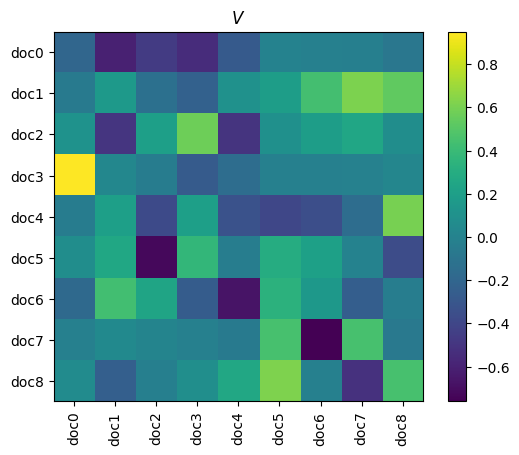

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V_T, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(c_names)))
ax = plt.gca()
ax.set_xticklabels(c_names, rotation=90)
ax.set_yticklabels(c_names)
plt.title("$V$")
plt.colorbar();

In [122]:
V_df = pd.DataFrame(V_T, index=c_names, columns=c_names)
V_df.apply(lambda x: np.round(x, decimals=2))
V_df

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8
doc0,-0.197393,-0.605990,-0.462918,-0.542114,-0.279469,-0.003815,-0.014631,-0.024137,-0.081957
doc1,-0.055914,0.165593,-0.127312,-0.231755,0.106775,0.192848,0.437875,0.615122,0.529937
doc2,0.110270,-0.497326,0.207606,0.569921,-0.505450,0.098184,0.192956,0.252904,0.079273
doc3,0.949785,0.028649,-0.041609,-0.267714,-0.150035,-0.015081,-0.015507,-0.010199,0.024555
doc4,-0.045679,0.206327,-0.378336,0.205605,-0.327194,-0.394841,-0.349485,-0.149798,0.601993
doc5,0.076594,0.256475,-0.724400,0.368861,-0.034813,0.300161,0.212201,-0.000097,-0.362219
doc6,-0.177318,0.432984,0.236890,-0.264800,-0.672304,0.340840,0.152195,-0.249146,-0.038034
doc7,-0.014393,0.049305,0.008826,-0.019467,-0.058350,0.454477,-0.761527,0.449643,-0.069638
doc8,0.063692,-0.242783,-0.024077,0.084207,0.262376,0.619847,-0.017975,-0.519890,0.453507


          doc0      doc1      doc2      doc3      doc4      doc5      doc6  \
doc0  0.197393  0.605990  0.462918  0.542114  0.279469  0.003815  0.014631   
doc1  0.055914  0.165593  0.127312  0.231755  0.106775  0.192848  0.437875   
doc2  0.110270  0.497326  0.207606  0.569921  0.505450  0.098184  0.192956   
doc3  0.949785  0.028649  0.041609  0.267714  0.150035  0.015081  0.015507   
doc4  0.045679  0.206327  0.378336  0.205605  0.327194  0.394841  0.349485   
doc5  0.076594  0.256475  0.724400  0.368861  0.034813  0.300161  0.212201   
doc6  0.177318  0.432984  0.236890  0.264800  0.672304  0.340840  0.152195   
doc7  0.014393  0.049305  0.008826  0.019467  0.058350  0.454477  0.761527   
doc8  0.063692  0.242783  0.024077  0.084207  0.262376  0.619847  0.017975   

          doc7      doc8  
doc0  0.024137  0.081957  
doc1  0.615122  0.529937  
doc2  0.252904  0.079273  
doc3  0.010199  0.024555  
doc4  0.149798  0.601993  
doc5  0.000097  0.362219  
doc6  0.249146  0.038034  
doc

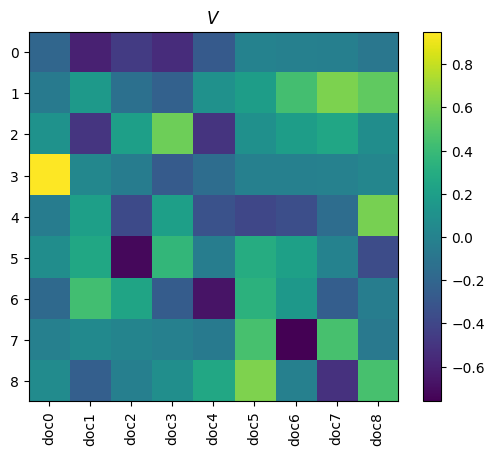

In [123]:
V_df_abs = np.abs(V_df)
print(V_df_abs)
plt.imshow(V_df, interpolation='none')
ax = plt.gca()
plt.xticks(range(len(V_df_abs.columns.values)))
plt.yticks(range(len(V_df_abs.index.values)))
plt.title("$V$")
ax.set_xticklabels(V_df_abs.columns.values, rotation=90)
plt.colorbar();

In [124]:
M_approx = np.matrix(U[:, :2]) * np.diag(S[:2]) * np.matrix(V_T[:2, :])

print("M calculated using only the first two components:\n")
print(pd.DataFrame(M_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(tdm - M_approx)

M calculated using only the first two components:

               doc0      doc1      doc2      doc3      doc4      doc5  \
human      0.162058  0.400498  0.378955  0.467566  0.175954 -0.052655   
interface  0.140585  0.369801  0.328996  0.400427  0.164972 -0.032815   
computer   0.152449  0.505004  0.357937  0.410107  0.236232  0.024217   
user       0.258049  0.841123  0.605720  0.697357  0.392318  0.033118   
system     0.448790  1.234365  1.050861  1.265796  0.556331 -0.073790   
response   0.159554  0.581682  0.375219  0.416898  0.276541  0.055904   
time       0.159554  0.581682  0.375219  0.416898  0.276541  0.055904   
EPS        0.218463  0.549581  0.510960  0.628058  0.242536 -0.065411   
survey     0.096906  0.532064  0.229914  0.211754  0.266525  0.136756   
trees     -0.061254  0.232108 -0.138898 -0.265646  0.144925  0.240421   
graph     -0.064677  0.335281 -0.145641 -0.301406  0.202756  0.305726   
minors    -0.043082  0.253906 -0.096667 -0.207858  0.151913  0.221227   


## SVD for Information Retrieval

SVD used for information retrieval is commonly referred to as Latent Semantic Indexing (LSI). To reduce the space needed to store all dimensions of document similarity and term similarity we can take the first two dimensions (which contains the most informative orthogonal factors).

In [125]:
scales = pd.DataFrame(np.matrix(S[:2]))
scales

,0,1
0,3.340884,2.541701


In [126]:
term_vectors = pd.DataFrame(np.matrix(U[:, :2]), index=words)
term_vectors

,0,1
human,-0.221351,-0.113180
interface,-0.197645,-0.072088
computer,-0.240470,0.043152
user,-0.403599,0.057070
system,-0.644481,-0.167301
response,-0.265037,0.107160
time,-0.265037,0.107160
EPS,-0.300828,-0.141270
survey,-0.205918,0.273647
trees,-0.012746,0.490162


In [127]:
doc_vectors = pd.DataFrame(np.matrix(V_T[:, :2]), index=c_names)
doc_vectors

,0,1
doc0,-0.197393,-0.605990
doc1,-0.055914,0.165593
doc2,0.110270,-0.497326
doc3,0.949785,0.028649
doc4,-0.045679,0.206327
doc5,0.076594,0.256475
doc6,-0.177318,0.432984
doc7,-0.014393,0.049305
doc8,0.063692,-0.242783


In [128]:
print("Query: human computer interaction")
print("human:\n", term_vectors.loc['human'])
print("computer:\n", term_vectors.loc['computer'])
print("interaction:\n", "not found")
query = term_vectors.loc['human'] + term_vectors.loc['computer']
print("query vector:\n", query)

Query: human computer interaction
human:
 0   -0.221351
1   -0.113180
Name: human, dtype: float64
computer:
 0   -0.240470
1    0.043152
Name: computer, dtype: float64
interaction:
 not found
query vector:
 0   -0.461821
1   -0.070028
dtype: float64


## SVD for word vectors

In [129]:
for doc in c_names:
    print(doc, docs.loc[doc][0], np.matrix(query) * np.diag(S[:2]) * np.matrix(doc_vectors.loc[doc]).transpose())

doc0 Human machine interface for Lab ABC computer applications [[0.41241527]]
doc1 A survey of user opinion of computer system response time [[0.05679465]]
doc2 The EPS user interface management system [[-0.08161526]]
doc3 System and human system engineering testing of EPS [[-1.47051329]]
doc4 Relation of user - perceived response time to error measurement [[0.03375294]]
doc5 The generation of random , binary , unordered trees [[-0.16382533]]
doc6 The intersection graph of paths in trees [[0.19651608]]
doc7 Graph minors IV : Widths of trees and well - quasi - ordering [[0.01343139]]
doc8 Graph minors : A survey [[-0.05505744]]


/var/folders/kq/tgm8hqh13ksgz3rv_7dvdk240000gn/T/ipykernel_35703/2926635031.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(doc, docs.loc[doc][0], np.matrix(query) * np.diag(S[:2]) * np.matrix(doc_vectors.loc[doc]).transpose())


In [130]:
from collections import OrderedDict
words = set()
i2w = {}
w2i = {}
wcount = 0
for doc in c_names:
    for w in docs.loc[doc][0].lower().split():
        if w not in w2i:
            i2w[wcount] = w
            w2i[w] = wcount
            wcount += 1
            words.add(w)
occurrences = OrderedDict((w, OrderedDict((w, 0) for w in words)) for w in words)

for doc in c_names:
    doc_words = docs.loc[doc][0].lower().split()
    for i in range(len(doc_words)):
        for item in doc_words[:i] + doc_words[i + 1:]:
            occurrences[doc_words[i]][item] += 1
wm = pd.DataFrame(occurrences, index = w2i.keys(), columns = w2i.keys())
wm

/var/folders/kq/tgm8hqh13ksgz3rv_7dvdk240000gn/T/ipykernel_35703/2496944971.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for w in docs.loc[doc][0].lower().split():
/var/folders/kq/tgm8hqh13ksgz3rv_7dvdk240000gn/T/ipykernel_35703/2496944971.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  doc_words = docs.loc[doc][0].lower().split()


,human,machine,interface,for,lab,abc,computer,applications,a,survey,...,graph,paths,in,minors,iv,:,widths,well,quasi,ordering
human,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
machine,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
interface,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
for,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
lab,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
computer,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
applications,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,1,0,0,2,...,1,0,0,1,0,1,0,0,0,0
survey,0,0,0,0,0,0,1,0,2,0,...,1,0,0,1,0,1,0,0,0,0


In [131]:
U, S, V_T = np.linalg.svd(wm)

In [132]:
print("U is a", U.shape, "matrix")
print("U = ")
print(np.round(U, decimals=2))

U is a (45, 45) matrix
U = 
[[-0.08 -0.15  0.   ... -0.    0.    0.  ]
 [-0.02 -0.07 -0.   ...  0.03  0.22  0.38]
 [-0.05 -0.14  0.03 ...  0.    0.    0.  ]
 ...
 [-0.13  0.21 -0.07 ...  0.37 -0.09  0.04]
 [-0.13  0.21 -0.07 ... -0.24  0.11 -0.03]
 [-0.13  0.21 -0.07 ...  0.25  0.08  0.04]]


In [133]:
print(np.diag(S))

[[20.18250077  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         11.25275618  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          8.98182767 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [134]:
print("V_T is a", V_T.shape, "matrix")
print("V_T = ")
print(np.round(V_T, decimals=2))

V_T is a (45, 45) matrix
V_T = 
[[-0.08 -0.02 -0.05 ... -0.13 -0.13 -0.13]
 [-0.15 -0.07 -0.14 ...  0.21  0.21  0.21]
 [ 0.   -0.    0.03 ... -0.07 -0.07 -0.07]
 ...
 [ 0.   -0.03 -0.   ... -0.37  0.24 -0.25]
 [ 0.   -0.22 -0.   ...  0.09 -0.11 -0.08]
 [ 0.   -0.38 -0.   ... -0.04  0.03 -0.04]]


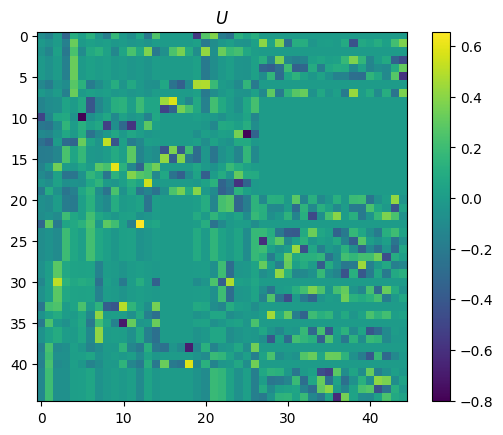

In [135]:
plt.imshow(U, interpolation='none')
ax = plt.gca()
plt.title("$U$")
plt.colorbar();

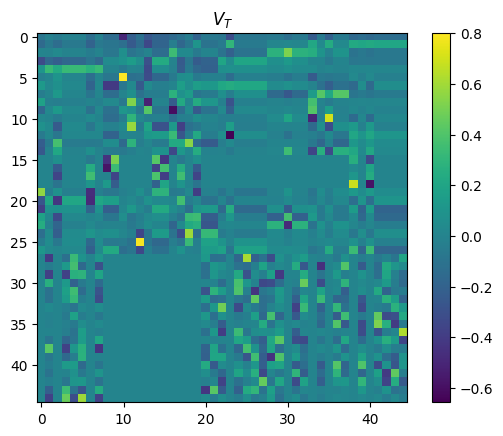

In [136]:
plt.imshow(V_T, interpolation='none')
ax = plt.gca()
plt.title("$V_T$")
plt.colorbar();

In [137]:
V_df = pd.DataFrame(V_T)
V_df.apply(lambda x: np.round(x, decimals=2))
V_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.084881,-1.602540e-02,-5.247176e-02,-1.602540e-02,-1.602540e-02,-1.602540e-02,-1.219786e-01,-1.602540e-02,-1.431383e-01,-1.431383e-01,...,-2.058833e-01,-5.951092e-02,-5.951092e-02,-1.583365e-01,-1.276273e-01,-1.583365e-01,-1.276273e-01,-1.276273e-01,-1.276273e-01,-1.276273e-01
1,-0.154361,-6.647703e-02,-1.368620e-01,-6.647703e-02,-6.647703e-02,-6.647703e-02,-1.909188e-01,-6.647703e-02,-9.002097e-02,-9.002097e-02,...,2.420989e-01,3.252539e-02,3.252539e-02,2.302955e-01,2.064354e-01,2.302955e-01,2.064354e-01,2.064354e-01,2.064354e-01,2.064354e-01
2,0.000508,-3.810160e-03,2.732135e-02,-3.810160e-03,-3.810160e-03,-3.810160e-03,-4.681076e-02,-3.810160e-03,-7.669542e-02,-7.669542e-02,...,-1.379654e-02,9.292552e-02,9.292552e-02,-9.951661e-02,-7.279766e-02,-9.951661e-02,-7.279766e-02,-7.279766e-02,-7.279766e-02,-7.279766e-02
3,-0.319019,-1.647126e-01,-2.170637e-01,-1.647126e-01,-1.647126e-01,-1.647126e-01,-9.027847e-02,-1.647126e-01,4.445891e-02,4.445891e-02,...,-6.615649e-02,3.384168e-03,3.384168e-03,-7.594420e-02,-6.990258e-02,-7.594420e-02,-6.990258e-02,-6.990258e-02,-6.990258e-02,-6.990258e-02
4,0.106336,3.253561e-01,2.351695e-01,3.253561e-01,3.253561e-01,3.253561e-01,2.761178e-01,3.253561e-01,-2.023833e-03,-2.023833e-03,...,1.443405e-02,-2.660888e-03,-2.660888e-03,1.858553e-02,1.438567e-02,1.858553e-02,1.438567e-02,1.438567e-02,1.438567e-02,1.438567e-02
5,-0.022407,6.202580e-03,9.744528e-02,6.202580e-03,6.202580e-03,6.202580e-03,-1.313516e-01,6.202580e-03,-8.060364e-02,-8.060364e-02,...,-7.673559e-02,-6.039400e-02,-6.039400e-02,2.819614e-02,-2.322557e-02,2.819614e-02,-2.322557e-02,-2.322557e-02,-2.322557e-02,-2.322557e-02
6,0.125420,2.520452e-02,7.807225e-02,2.520452e-02,2.520452e-02,2.520452e-02,-1.869128e-01,2.520452e-02,-4.091970e-01,-4.091970e-01,...,-2.146302e-01,-1.114583e-01,-1.114583e-01,-1.521502e-01,5.732551e-02,-1.521502e-01,5.732551e-02,5.732551e-02,5.732551e-02,5.732551e-02
7,-0.037283,4.519043e-03,1.232496e-01,4.519043e-03,4.519043e-03,4.519043e-03,-8.807714e-02,4.519043e-03,-1.333722e-01,-1.333722e-01,...,2.133115e-01,4.152668e-01,4.152668e-01,-8.834803e-02,-5.706990e-02,-8.834803e-02,-5.706990e-02,-5.706990e-02,-5.706990e-02,-5.706990e-02
8,0.178304,-2.137373e-02,-3.112202e-02,-2.137373e-02,-2.137373e-02,-2.137373e-02,2.801299e-03,-2.137373e-02,2.881570e-02,2.881570e-02,...,-5.092224e-02,-2.940743e-03,-2.940743e-03,4.972110e-03,1.076302e-02,4.972110e-03,1.076302e-02,1.076302e-02,1.076302e-02,1.076302e-02
9,-0.171303,2.152711e-02,1.271152e-01,2.152711e-02,2.152711e-02,2.152711e-02,-1.045426e-01,2.152711e-02,-1.125522e-01,-1.125522e-01,...,1.561927e-01,-1.580499e-02,-1.580499e-02,1.754880e-02,-9.357384e-03,1.754880e-02,-9.357384e-03,-9.357384e-03,-9.357384e-03,-9.357384e-03


In [138]:
wm

,human,machine,interface,for,lab,abc,computer,applications,a,survey,...,graph,paths,in,minors,iv,:,widths,well,quasi,ordering
human,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
machine,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
interface,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
for,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
lab,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
computer,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
applications,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,1,0,0,2,...,1,0,0,1,0,1,0,0,0,0
survey,0,0,0,0,0,0,1,0,2,0,...,1,0,0,1,0,1,0,0,0,0


In [139]:
M_approx = np.matrix(U[:, :2]) * np.diag(S[:2]) * np.matrix(V_T[:2, :])

print("\nError from actual value:\n")
print(wm - M_approx)


Error from actual value:

                 human   machine  interface       for       lab       abc  \
human        -0.413532  0.857077   0.672383  0.857077  0.857077  0.857077   
machine       0.857077 -0.054911   0.880649  0.945089  0.945089  0.945089   
interface     0.672383  0.880649  -0.266346  0.880649  0.880649  0.880649   
for           0.857077  0.945089   0.880649 -0.054911  0.945089  0.945089   
lab           0.857077  0.945089   0.880649  0.945089 -0.054911  0.945089   
abc           0.857077  0.945089   0.880649  0.945089  0.945089 -0.054911   
computer      0.459415  0.817731   0.576794  0.817731  0.817731  0.817731   
applications  0.857077  0.945089   0.880649  0.945089  0.945089  0.945089   
a            -0.401576 -0.113636  -0.290224 -0.113636 -0.113636 -0.113636   
survey       -0.401576 -0.113636  -0.290224 -0.113636 -0.113636 -0.113636   
of           -0.068679 -0.254970  -0.719693 -0.254970 -0.254970 -0.254970   
user         -0.792071 -0.251241   0.397474 -0.25

In [140]:
m_approx_table = pd.DataFrame(M_approx, index=w2i.keys(), columns=w2i.keys())
print("M calculated using only the first two components:\n")
m_approx_table

M calculated using only the first two components:



,human,machine,interface,for,lab,abc,computer,applications,a,survey,...,graph,paths,in,minors,iv,:,widths,well,quasi,ordering
human,0.413532,0.142923,0.327617,0.142923,0.142923,0.142923,0.540585,0.142923,0.401576,0.401576,...,-0.067823,0.045452,0.045452,-0.128773,-0.139936,-0.128773,-0.139936,-0.139936,-0.139936,-0.139936
machine,0.142923,0.054911,0.119351,0.054911,0.054911,0.054911,0.182269,0.054911,0.113636,0.113636,...,-0.114513,-0.005083,-0.005083,-0.121061,-0.113145,-0.121061,-0.113145,-0.113145,-0.113145,-0.113145
interface,0.327617,0.119351,0.266346,0.119351,0.119351,0.119351,0.423206,0.119351,0.290224,0.290224,...,-0.154818,0.012931,0.012931,-0.186992,-0.182767,-0.186992,-0.182767,-0.182767,-0.182767,-0.182767
for,0.142923,0.054911,0.119351,0.054911,0.054911,0.054911,0.182269,0.054911,0.113636,0.113636,...,-0.114513,-0.005083,-0.005083,-0.121061,-0.113145,-0.121061,-0.113145,-0.113145,-0.113145,-0.113145
lab,0.142923,0.054911,0.119351,0.054911,0.054911,0.054911,0.182269,0.054911,0.113636,0.113636,...,-0.114513,-0.005083,-0.005083,-0.121061,-0.113145,-0.121061,-0.113145,-0.113145,-0.113145,-0.113145
abc,0.142923,0.054911,0.119351,0.054911,0.054911,0.054911,0.182269,0.054911,0.113636,0.113636,...,-0.114513,-0.005083,-0.005083,-0.121061,-0.113145,-0.121061,-0.113145,-0.113145,-0.113145,-0.113145
computer,0.540585,0.182269,0.423206,0.182269,0.182269,0.182269,0.710454,0.182269,0.545780,0.545780,...,-0.013266,0.076630,0.076630,-0.104961,-0.129301,-0.104961,-0.129301,-0.129301,-0.129301,-0.129301
applications,0.142923,0.054911,0.119351,0.054911,0.054911,0.054911,0.182269,0.054911,0.113636,0.113636,...,-0.114513,-0.005083,-0.005083,-0.121061,-0.113145,-0.121061,-0.113145,-0.113145,-0.113145,-0.113145
a,0.401576,0.113636,0.290224,0.113636,0.113636,0.113636,0.545780,0.113636,0.504700,0.504700,...,0.349531,0.138973,0.138973,0.224131,0.159585,0.224131,0.159585,0.159585,0.159585,0.159585
survey,0.401576,0.113636,0.290224,0.113636,0.113636,0.113636,0.545780,0.113636,0.504700,0.504700,...,0.349531,0.138973,0.138973,0.224131,0.159585,0.224131,0.159585,0.159585,0.159585,0.159585


In [145]:
k=10
# print the word vectors of dimensionality k=10 for the first 20 words
for i in range(20):
    print(i2w[i], U[i][:k])

human [-0.08488071 -0.15436087  0.00050785 -0.31901895  0.10633551  0.02240663
  0.1254204  -0.03728331 -0.1783039   0.17130254]
machine [-0.0160254  -0.06647703 -0.00381016 -0.1647126   0.32535608 -0.00620258
  0.02520452  0.00451904  0.02137373 -0.02152711]
interface [-0.05247176 -0.136862    0.02732135 -0.21706369  0.23516948 -0.09744528
  0.07807225  0.12324964  0.03112202 -0.12711525]
for [-0.0160254  -0.06647703 -0.00381016 -0.1647126   0.32535608 -0.00620258
  0.02520452  0.00451904  0.02137373 -0.02152711]
lab [-0.0160254  -0.06647703 -0.00381016 -0.1647126   0.32535608 -0.00620258
  0.02520452  0.00451904  0.02137373 -0.02152711]
abc [-0.0160254  -0.06647703 -0.00381016 -0.1647126   0.32535608 -0.00620258
  0.02520452  0.00451904  0.02137373 -0.02152711]
computer [-0.12197858 -0.19091884 -0.04681076 -0.09027847  0.27611783  0.13135159
 -0.18691277 -0.08807714 -0.0028013   0.10454261]
applications [-0.0160254  -0.06647703 -0.00381016 -0.1647126   0.32535608 -0.00620258
  0.0252

In [142]:
from numpy import dot
from numpy.linalg import norm

def similarity(a,b):
    return dot(a, b)/(norm(a)*norm(b))

def word_sim(a,b,k=10):
    if a in w2i:
        a_wv = U[w2i[a]][:k]
    else:
        raise ValueError("unknown word {}".format(a))
    if b in w2i:
        b_wv = U[w2i[b]][:k]
    else:
        raise ValueError("unknown word {}".format(b))
    return similarity(a_wv, b_wv)

In [146]:
print('graph', 'trees', word_sim('graph','trees'))
print('graph', 'human', word_sim('graph','human'))
print('graph', 'binary', word_sim('graph','binary', k=40))

graph trees 0.542197938805425
graph human -0.29247536452735073
graph binary 1.1651669443090366e-16



[Baker]: K. Baker. SVD Tutorial. http://www.ling.ohio-state.edu/~kbaker/pubs/Singular_Value_Decomposition_Tutorial.pdf

[Cleary]: F. Cleary. SVD and applications. http://www.frankcleary.com/svd/

[Gorrell]: G. Gorrell. Generalized Hebbian Algorithm for Incremental Singular Value Decomposition in Natural Language Processing. EACL 2006.

## End

In [1]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../css/notebook.css", "r").read()
    return HTML(styles)
css_styling()